#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [54]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head() # head print the first 5
df.tail() # tail print the last 5


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [55]:
# Write a brief report summarizing the findings and insights from the analyses.
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")
print(f"And these are the columns: {list(df.columns)}")
a = df.loc[df[df.columns.drop("Id")].duplicated(keep=False)].index
print(f"There are {len(a)} duplicated rows and all have no data: {list(a)}")
print(f"The average of Salary is {round(df["TotalPay"].mean(),2)}, and it has a standard deviation of {round(df['TotalPay'].std(),2)}, and we know when the standard deviation is high, the data is more spread out from the mean, and when it's low, the data is more concentrated around the mean, and the range of salary is from {round(df['TotalPay'].min(),2)} to {round(df['TotalPay'].max(),2)}")
a = df.columns[df.isnull().any()]
b = list(df[a].isnull().sum())
c = dict(zip(a, b))
print(f"These columns have missing data: {c}")
print(
    f",and these columns doesn't have any data: {list(df.columns[df.isnull().all()])}"
)
print(
    f"and this column has the same data: {list(df.columns[df.nunique() == 1])}, and it's: {list(df[df.columns[df.nunique() == 1]].iloc[0])}"
)
print(
    f"We noticed that there's a strong positive correlation between TotalPay and BasePay which means that the more the BasePay the more the TotalPay and the correlation is {round(df['TotalPay'].corr(df['BasePay']),4)}"
)

The dataset contains 148654 rows and 13 columns
And these are the columns: ['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency', 'Status']
There are 4 duplicated rows and all have no data: [148646, 148650, 148651, 148652]
The average of Salary is 74768.32, and it has a standard deviation of 50517.01, and we know when the standard deviation is high, the data is more spread out from the mean, and when it's low, the data is more concentrated around the mean, and the range of salary is from -618.13 to 567595.43
These columns have missing data: {'BasePay': 609, 'OvertimePay': 4, 'OtherPay': 4, 'Benefits': 36163, 'Notes': 148654, 'Status': 148654}
,and these columns doesn't have any data: ['Notes', 'Status']
and this column has the same data: ['Agency'], and it's: ['San Francisco']
We noticed that there's a strong positive correlation between TotalPay and BasePay which means that the more the BasePay th

In [56]:
# identify the number of rows and columns
print("# of rows: ", len(df))
print("# of columns: ", len(df.columns))
# or using df.shape return a tuple with the number of rows and columns
print(df.shape)

# of rows:  148654
# of columns:  13
(148654, 13)


In [57]:
# determine the data type of each column
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [58]:
# check for missing values
print(df.isnull().sum().sort_values(ascending=False))

Notes               148654
Status              148654
Benefits             36163
BasePay                609
OvertimePay              4
OtherPay                 4
Id                       0
EmployeeName             0
JobTitle                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
dtype: int64


In [59]:
# calculate the basic statistics for the numeric salary
print("Mode\t\t" + str(df["TotalPay"].mode()[0]))
print(df["TotalPay"].agg(["mean", "median", "std", "min", "max"]))

Mode		0.0
mean       74768.321972
median     71426.610000
std        50517.005274
min         -618.130000
max       567595.430000
Name: TotalPay, dtype: float64


In [60]:
# determine the range of the salary
print(df["TotalPay"].min() ,"to", df["TotalPay"].max())

-618.13 to 567595.43


In [61]:
# find standard deviation of the salary
print("Standard Deviation: ",df["TotalPay"].std())

Standard Deviation:  50517.00527394987


Handling Missing Data

In [62]:
# first of all let's understand the data
print(df.info())
# we noticed that there is no data in notes and status columns so we can drop them
df = df.drop(["Notes", "Status"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB
None


In [63]:
# what about unique values in each column ?
print(df.nunique())
# we can see that all data for the same agency so we don't need this column as well, because it will not add any value to our analysis
df = df.drop(["Agency"], axis=1)

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98465
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Agency                   1
dtype: int64


In [64]:
# check if there's duplicated rows
print(df.loc[df[df.columns.drop("Id")].duplicated(keep=False)])
# We noticed that there are 4 duplicated rows, and it's empty rows so we can drop them
df = df.drop(df.loc[df[df.columns.drop("Id")].duplicated(keep=False)].index)
print(df.loc[df[df.columns.drop("Id")].duplicated(keep=False)])

            Id  EmployeeName      JobTitle  BasePay  OvertimePay  OtherPay  \
148646  148647  Not provided  Not provided      NaN          NaN       NaN   
148650  148651  Not provided  Not provided      NaN          NaN       NaN   
148651  148652  Not provided  Not provided      NaN          NaN       NaN   
148652  148653  Not provided  Not provided      NaN          NaN       NaN   

        Benefits  TotalPay  TotalPayBenefits  Year  
148646       NaN       0.0               0.0  2014  
148650       NaN       0.0               0.0  2014  
148651       NaN       0.0               0.0  2014  
148652       NaN       0.0               0.0  2014  
Empty DataFrame
Columns: [Id, EmployeeName, JobTitle, BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits, Year]
Index: []


In [65]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 148650 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 12.5+ MB
None


In [66]:
# Handling missing values -> Base Pay & Benefits
# drop rows with missing values using dropna() -> may the data is necessary and we can't discard it or large number of rows
# fill missing values with a specific value using fillna() -> with what value?
# mean: average -> we'll use it because it's the most common way to fill missing values

df["BasePay"].fillna(df["BasePay"].mean(), inplace=True)
df["Benefits"].fillna(df["Benefits"].mean(), inplace=True)

df.isnull().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
dtype: int64

histograms or bar charts to visualize the distribution of salaries

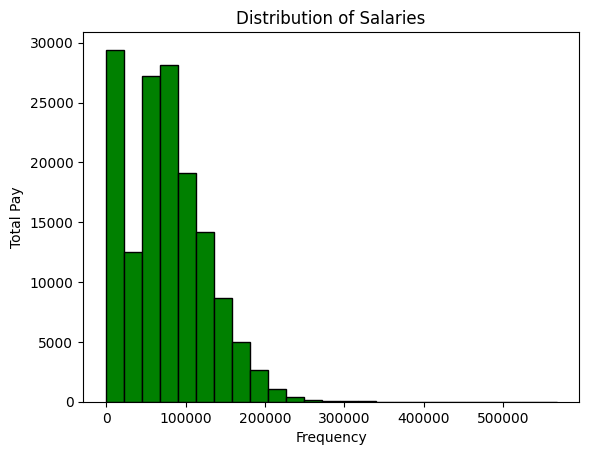

In [67]:
plt.hist(df["TotalPay"], bins=25, edgecolor="black", color="green")
plt.title("Distribution of Salaries")
plt.xlabel("Frequency")
plt.ylabel("Total Pay")
plt.show()

pie charts to represent the proportion of employees in different departments.

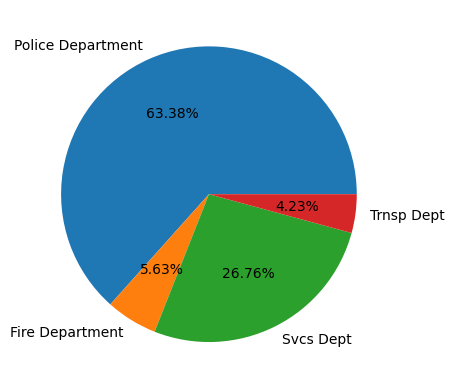

In [68]:
job_title = (
    df["JobTitle"]
    .loc[df["JobTitle"].str.contains(r"Dept|Department", regex=True)]
    .unique()
)
department = []
for i in job_title:
    match = re.search(r"(\w+)\s+(Dept|Department)", i)
    if match:
        department.append(match.group())
department = list(set(department))
department.remove("of Dept")

department_count = []
for i in department:
    department_count.append(df["JobTitle"].loc[df["JobTitle"].str.contains(i)].count())
department_count[department.index("Fire Dept")] += department_count[
    department.index("Fire Department")
]
del department_count[department.index("Fire Dept")]
department.remove("Fire Dept")

plt.pie(department_count, labels=department, autopct="%.2f%%")

plt.show()

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [69]:
data = df.groupby(["JobTitle"])["TotalPay"].describe()[["mean", "std", "count"]]
data.sort_values("mean", ascending=False)
print(
    "The highest salary job: "
    + str(data.iloc[0].name)
    + " with average salary: "
    + str(data.iloc[0]["mean"])
)
data

The highest salary job: ACCOUNT CLERK with average salary: 44035.66433734941


,mean,std,count
JobTitle,,,
ACCOUNT CLERK,44035.664337,13170.742908,83.0
ACCOUNTANT,47429.268000,27137.331315,5.0
ACCOUNTANT INTERN,29031.742917,20711.322649,48.0
"ACPO,JuvP, Juv Prob (SFERS)",62290.780000,NaN,1.0
ACUPUNCTURIST,67594.400000,NaN,1.0
...,...,...,...
X-RAY LABORATORY AIDE,52705.880385,19760.943417,26.0
X-Ray Laboratory Aide,50823.942700,24170.083004,100.0
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",53632.870000,NaN,1.0


In [70]:
correlation = df['TotalPay'].corr(df['BasePay'])
print("Correlation of TotalPay to BasePay",correlation)
# There's a strong positive correlation between TotalPay and BasePay which means that the more the BasePay the more the TotalPay (TotalPay is sum(BasePay, OvertimePay, OtherPay)

Correlation of TotalPay to BasePay 0.9505423082497897


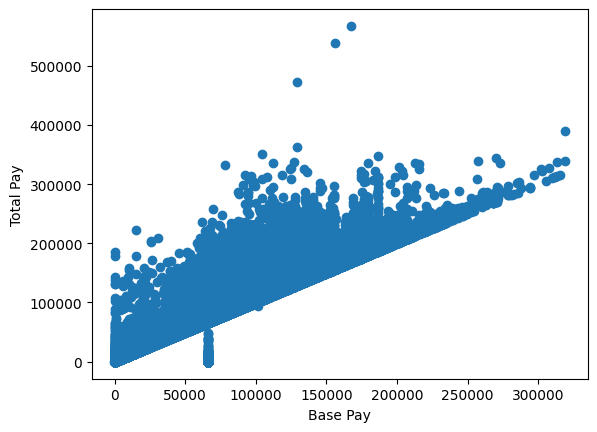

In [71]:
plt.scatter(df["BasePay"],df["TotalPay"])
plt.xlabel("Base Pay")
plt.ylabel("Total Pay")
plt.show()

# Good Luck!